In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacex-launches-data/SpaceX_Launches_Data.csv


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv('/kaggle/input/spacex-launches-data/SpaceX_Launches_Data.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [55]:
X.columns

Index(['BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount'],
      dtype='object')

In [50]:
df["Outcome"].nunique

<bound method IndexOpsMixin.nunique of 0       None None
1       None None
2       None None
3     False Ocean
4       None None
         ...     
85      True ASDS
86      True ASDS
87      True ASDS
88      True ASDS
89      True ASDS
Name: Outcome, Length: 90, dtype: object>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [17]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,2.788889,-86.366477,29.449963
std,26.124701,4732.115291,1.213172,1.595288,3.439671,14.149518,2.141306
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,90.000000,15600.000000,6.000000,5.000000,10.000000,-80.577366,34.632093


In [18]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
columns_to_drop = ['FlightNumber','Date','Serial','Longitude','Latitude','Flights']

df.drop(columns=columns_to_drop, inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = [column for column in df.columns if df[column].dtype.name == 'object']
for column in categorical_columns:
   df[column] = le.fit_transform(df[column])

In [28]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = [column for column in df.columns if df[column].dtype.name == 'bool']
for column in categorical_columns:
   df[column] = le.fit_transform(df[column].astype(np.int))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BoosterVersion  90 non-null     int64  
 1   PayloadMass     90 non-null     float64
 2   Orbit           90 non-null     int64  
 3   LaunchSite      90 non-null     int64  
 4   Outcome         90 non-null     int64  
 5   GridFins        90 non-null     int64  
 6   Reused          90 non-null     int64  
 7   Legs            90 non-null     int64  
 8   LandingPad      90 non-null     int64  
 9   Block           90 non-null     float64
 10  ReusedCount     90 non-null     int64  
dtypes: float64(2), int64(9)
memory usage: 7.9 KB


In [30]:
df = df.fillna(df.mean())

In [31]:
df.isnull().sum()

BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

stand_data=['PayloadMass']

scaler = StandardScaler()
df[stand_data] = scaler.fit_transform(df[stand_data])

df[stand_data].head()

,PayloadMass
0,0.000000
1,-1.189724
2,-1.157423
3,-1.195037
4,-0.627646


<Axes: >

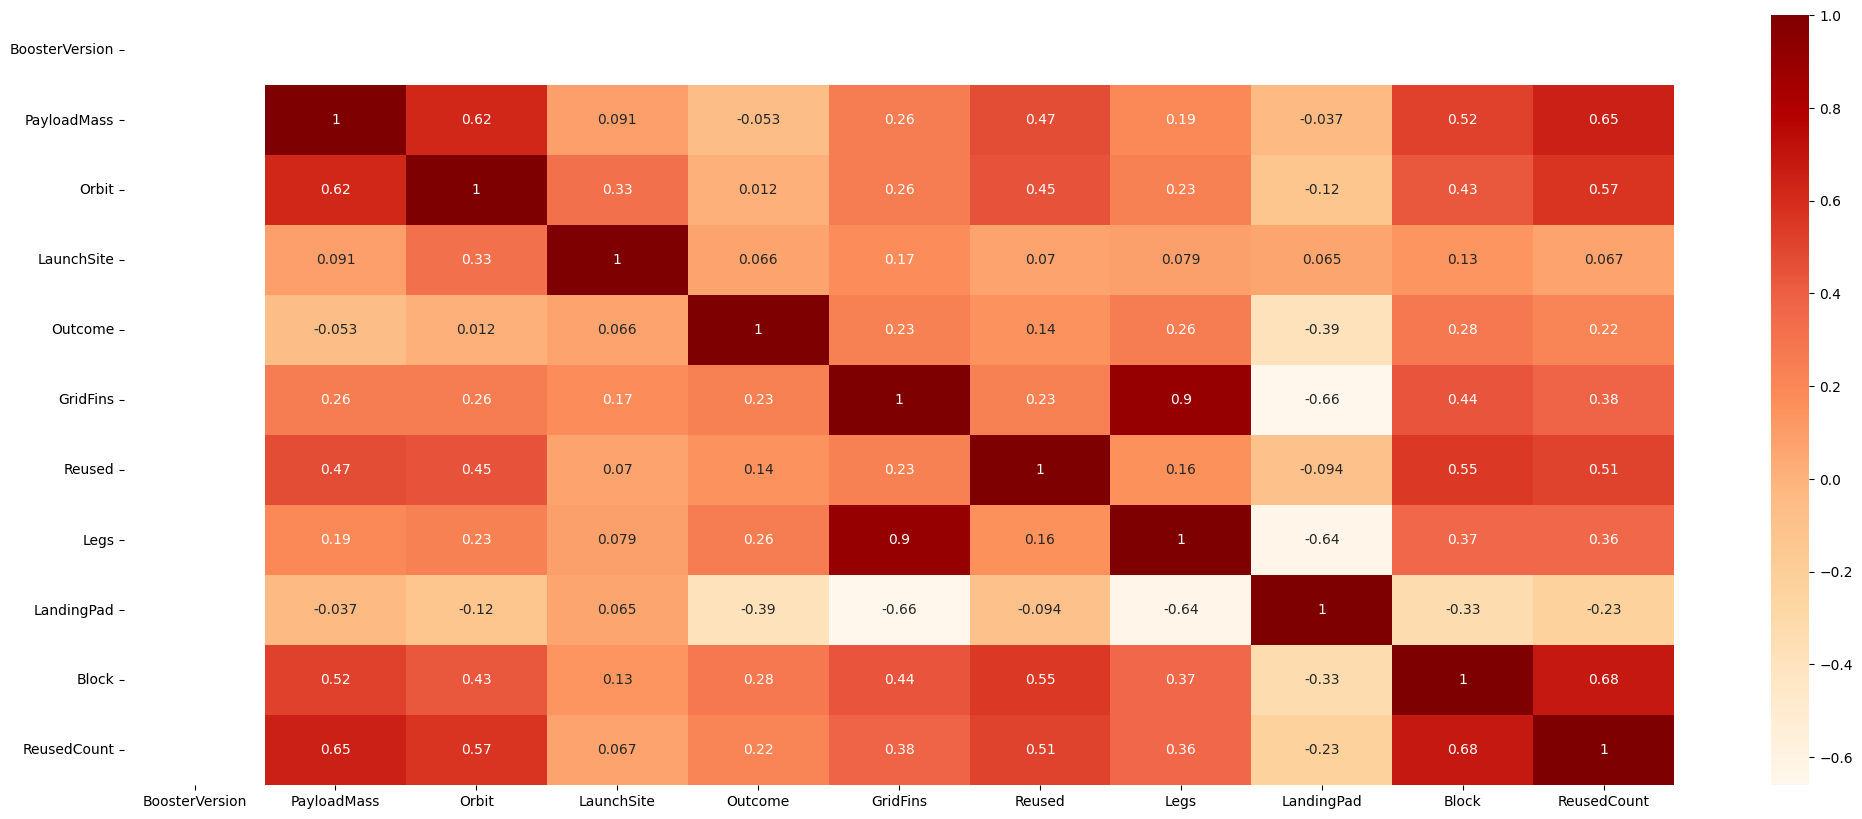

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation heatmap of data
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), cmap="OrRd",annot=True)

In [34]:
X = df.drop(['Outcome'], axis=1.0)
Y = df['Outcome'] 

In [45]:
df['Outcome'].nunique

<bound method IndexOpsMixin.nunique of 0     4
1     4
2     4
3     1
4     4
     ..
85    5
86    5
87    5
88    5
89    5
Name: Outcome, Length: 90, dtype: int64>

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.7391304347826086


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,"%")

Accuracy: 82.6086956521739 %


In [40]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 58.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pickle

def save_model(model, filename):
    # Save the model to disk
    pickle.dump(model, open(filename, 'wb'))

def load_model(filename):
    # Load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    return loaded_model

In [42]:
filenamelr = 'model.sav'

save_model(dtc, filenamelr)
model_rndclass_loaded= load_model(filenamelr)

In [1]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/34/01/9d1460a6e71d6226e1f5c5053de20758c41100c5c15abb73551273a96fb8/streamlit-1.27.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/17/16/b12fca347ff9d062e3c44ad9641d2ec50364570a059f3078ada3a5119d7a/altair-5.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bf/2b/11bcedb7dee4923253a4a21bae3be854bcc4f06295bd827756352016d97c/blinker-1.6.3-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow>=6.0 from https://files.pythonhosted.org/packages/ff/9e/4e2f6292616fed075d4bdf2a69d01cfa35fe3fcff52155d548c333e0a169/pyarrow-13.0.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/be/2a/4e62ff633612f746f88618852a626bbe24226eba5e7ac90e91dcfd6a41

In [2]:
pip install streamlit_lottie

  Obtaining dependency information for streamlit_lottie from https://files.pythonhosted.org/packages/52/b5/8ad7fa3101ec5baed712107a4cf304f174261f2ed2bebe063ad1fbedfe88/streamlit_lottie-0.0.5-py3-none-any.whl.metadata
   ---------------------------------------- 802.4/802.4 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
